# Houses' price project:
I. Goal

    -Observe the trend of houses' prices over the period
    -Define the characteristics of houses which increased prices
    -See if any relevant between the houses' prices trend in Denvor and the trend of United State housing bubble's period

II. Working

1/ Data preparation
    
    1.1 View data
    1.2 Clean data

2/ Data analysis
    
    2.1 By rooms
    2.2 By location


![](http://chidaco.com/wp-content/uploads/2019/09/13cc2c0e59157ecd03d6cba998fe261b.jpeg)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
url='https://raw.githubusercontent.com/pirple/Data-Mining-With-Python/master/Part%202/single_family_home_values.csv'
df=pd.read_csv(url,sep=',')
df.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676


# 1/ Data preparation
## 1.1 View data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [13]:
np.round(df.describe(),2)

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.00,14985.00,14985.00,15000.00,15000.00,15000.00,15000.00,15000.00,14999.00,15000.00,11287.00,15000.00
mean,5.176229e+07,80204.92,39.74,-104.96,2.71,2.20,6.16,1514.50,5820.77,1929.52,405356.34,259435.01,637162.55
std,6.190876e+07,9.72,0.02,0.04,0.90,1.17,1.96,830.64,3013.28,29.94,775699.85,337938.70,504418.49
min,1.433670e+05,80022.00,39.61,-105.11,0.00,0.00,0.00,350.00,278.00,1874.00,259.00,0.00,147767.00
25%,1.004802e+07,80205.00,39.73,-104.98,2.00,1.00,5.00,986.00,4620.00,1907.00,194000.00,110000.00,398434.75
50%,2.563241e+07,80206.00,39.75,-104.96,3.00,2.00,6.00,1267.50,5950.00,1925.00,320000.00,210000.00,518357.50
75%,5.114222e+07,80207.00,39.76,-104.94,3.00,3.00,7.00,1766.25,6270.00,1949.00,463200.00,330240.00,687969.25
max,3.209481e+08,80209.00,39.89,-104.83,15.00,12.00,39.00,10907.00,122839.00,2016.00,45600000.00,16000000.00,10145310.00


In [14]:
# Writing function to show null rows in value and percentage
missing_columns = df[['latitude', 'longitude', 'priorSaleDate', 'priorSaleAmount']]
for col in missing_columns:
    missing_data = df[col].isna().sum()
    perc = round((missing_data * 100 / len(df)), 2)
    print(f'{col}: missing entries: {missing_data}, percentage {perc}%')

latitude: missing entries: 15, percentage 0.1%
longitude: missing entries: 15, percentage 0.1%
priorSaleDate: missing entries: 3827, percentage 25.51%
priorSaleAmount: missing entries: 3713, percentage 24.75%


In [13]:
## check if there are multiple samples with the same address
df[df.duplicated(subset = 'address',keep=False)] #show all duplicated address

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
3274,320948074,3650 N Adams St,Denver,CO,80205,NaN,NaN,4,4.0,7,2826,4690,2016.0,2017-05-23,735000,NaN,NaN,745537
4762,248507008,3118 N Vine St,Denver,CO,80205,NaN,NaN,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,NaN,NaN,670436
4764,216346608,3118 N Vine St,Denver,CO,80205,39.761214,-104.961873,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,NaN,NaN,671744
6145,4277764,3650 N Adams St,Denver,CO,80205,NaN,NaN,1,1.0,3,472,9370,1926.0,2015-07-20,250000,NaN,NaN,745483


In this part, I do these steps:

- To see information included (columns' name, the number of rows, data type, number of null and non-null lines...)
- To see if there are special points with null lines

-> Most of null lines are from 'priorSaleDate' and 'priorSaleAmount', these 2 columns have both NaN on same lines. The lines equal 0 in priorSaleAmount are also noticeable because they still have priorSaleDate

-> 15 houses do not have longtitude and latitude. These houses belong to zipcode 80203-80206, but these areas have many houses. The year they were sold was after 2011, but this period also had many houses sold. Therefore, no significantly common points for these houses. Besides, 15 is a small amount, so I still use latitude and longtitude for further investigation later on

- In addition, I define the columns which is most relevant with 'priorSaleAmount' in order to fill missing value in this column.

In [9]:
# Show missing values of 'priorSaleAmount' to observe the relevant with 'priorSaleDate'
df[df['priorSaleAmount'].isnull()]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
15,184328555,4254 W Monmouth Ave,Denver,CO,80123,39.629000,-105.042330,2,2.0,4,1297,16600,1962.0,2011-11-07,150000,NaN,NaN,354031
18,51335315,5655 S Fenton St,Denver,CO,80123,39.615488,-105.060173,3,3.0,7,2321,6151,1998.0,1999-12-02,277900,NaN,NaN,504791
19,152799217,5626 S Fenton St,Denver,CO,80123,39.616153,-105.059696,3,3.0,7,2071,6831,1999.0,2000-02-04,271800,NaN,NaN,495121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14987,51037171,420 S Humboldt St,Denver,CO,80209,39.708868,-104.969541,2,2.0,5,1145,4760,1924.0,2000-06-09,334900,NaN,NaN,700184
14988,184307468,1001 S Milwaukee Way,Denver,CO,80209,39.697471,-104.951719,2,1.0,5,1145,5520,1942.0,2011-09-26,396000,NaN,NaN,691734
14991,19402362,703 S Vine St,Denver,CO,80209,39.703698,-104.963195,3,2.0,7,1401,6510,1931.0,2010-08-30,499900,NaN,NaN,900818
14992,184311569,445 S Pearl St,Denver,CO,80209,39.708452,-104.980694,3,2.0,8,1657,4690,1892.0,1998-04-08,81800,NaN,NaN,632156


In [11]:
# Show 0 values of 'priorSaleAmount' to observe the relevant with 'priorSaleDate'
df[df['priorSaleAmount'].eq(0)]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,0.0,496079
41,43174426,4951 S Ammons St,Denver,CO,80123,39.626582,-105.087250,3,2.0,8,1858,6890,1986.0,2012-07-30,231600,2012-03-30,0.0,418814
56,17056170,3979 W Chenango Ave,Denver,CO,80123,39.629760,-105.038706,3,2.0,5,1118,12200,1961.0,2009-12-23,171222,2009-06-19,0.0,348035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14925,22409145,817 S Sherman St,Denver,CO,80209,39.701547,-104.985422,2,1.0,5,1140,4160,1885.0,2010-10-29,260000,2010-05-06,0.0,556794
14933,46375088,554 S Logan St,Denver,CO,80209,39.706511,-104.982462,2,3.0,6,1908,4430,1927.0,2012-01-06,395490,2011-09-26,0.0,693058
14965,39599923,51 S Harrison St,Denver,CO,80209,39.715237,-104.941694,2,2.0,5,887,6250,1925.0,2009-12-22,237000,2009-08-17,0.0,579135
14968,786671,1033 S Washington St,Denver,CO,80209,39.697715,-104.979560,2,2.0,6,1143,4160,1900.0,2006-12-07,366000,2005-11-23,0.0,605270


In [12]:
# Show missing values of 'latitude' to observe if there is any common points
df[df['latitude'].isnull()]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
198,24536341,944 N Lincoln St,Denver,CO,80203,NaN,NaN,1,1.0,4,1032,3140,1896.0,2015-10-29,1400000,1997-08-21,150000.0,473990
450,24536342,950 N Lincoln St,Denver,CO,80203,NaN,NaN,3,2.0,10,2740,3140,1910.0,2015-10-29,1400000,1991-11-21,74100.0,716696
452,140073812,71 N Pennsylvania St,Denver,CO,80203,NaN,NaN,2,1.0,5,950,4690,1895.0,2016-01-21,330000,1995-05-26,NaN,466582
549,205474028,1071 N Washington St,Denver,CO,80203,NaN,NaN,1,1.0,4,750,1013,1888.0,2012-11-26,203000,2008-11-19,161000.0,350965
757,39540559,1823 Hooker St # 3,Denver,CO,80204,NaN,NaN,3,2.0,5,1300,7000,1955.0,2015-12-21,465000,2015-12-01,419000.0,540293
2451,25727750,803 Mariposa St,Denver,CO,80204,NaN,NaN,2,2.0,7,4025,3132,1913.0,2002-03-12,279000,2000-09-12,215000.0,632213
3274,320948074,3650 N Adams St,Denver,CO,80205,NaN,NaN,4,4.0,7,2826,4690,2016.0,2017-05-23,735000,NaN,NaN,745537
3870,184192336,2134 N Williams St,Denver,CO,80205,NaN,NaN,4,1.0,8,2100,10940,1893.0,2011-10-12,306800,NaN,NaN,719222
3928,253167748,3346 N Williams St,Denver,CO,80205,NaN,NaN,3,3.0,6,1848,3125,2016.0,2016-09-30,55200,NaN,NaN,577147
4762,248507008,3118 N Vine St,Denver,CO,80205,NaN,NaN,4,4.0,8,1908,4685,2012.0,2013-02-21,425000,NaN,NaN,670436


In [18]:
#check if any indexs contain bedroom +bathroom> room
df[df['bedrooms']+df['bathrooms']>df['rooms']]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514
12,39577604,4776 S Gar Way,Denver,CO,80123,39.630547,-105.100242,3,4.0,6,1804,6952,1983.0,2004-07-19,247000,1999-06-07,187900.0,389415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,154213058,3333 Belcaro Dr,Denver,CO,80209,39.703564,-104.948372,4,5.0,7,3697,30200,1950.0,2015-03-17,1240000,2012-01-06,665000.0,1815851
14896,30498989,1080 S Franklin St,Denver,CO,80209,39.696880,-104.968379,4,4.0,7,2674,6300,1926.0,2006-07-11,1065000,NaN,NaN,1936110
14898,184309848,1059 S Columbine St,Denver,CO,80209,39.697264,-104.957282,4,6.0,8,3442,6160,2014.0,2013-08-15,535000,NaN,NaN,1802858
14962,39571274,947 S York St,Denver,CO,80209,39.699400,-104.960886,3,4.0,6,2166,4720,1921.0,2010-09-21,745000,2005-09-26,380000.0,1196424


In [19]:
# To see the correlation between 'priorSaleAmount' and other elements
df.corr().loc['priorSaleAmount', :].sort_values(ascending=False)

priorSaleAmount    1.000000
estimated_value    0.590177
squareFootage      0.506272
bathrooms          0.453678
lastSaleAmount     0.381526
rooms              0.370929
lotSize            0.226043
bedrooms           0.211982
yearBuilt          0.113356
longitude          0.097487
zipcode            0.033123
id                 0.012363
latitude          -0.225513
Name: priorSaleAmount, dtype: float64

In [20]:
# To see the correlation between 'estimated_value' and other elements. This is used for data modelling step
df.corr().loc['estimated_value', :].sort_values(ascending=False)

estimated_value    1.000000
squareFootage      0.824573
bathrooms          0.716017
priorSaleAmount    0.590177
rooms              0.581110
lotSize            0.456548
lastSaleAmount     0.418464
bedrooms           0.369217
yearBuilt          0.174464
id                 0.126225
longitude          0.121984
zipcode            0.089104
latitude          -0.266127
Name: estimated_value, dtype: float64

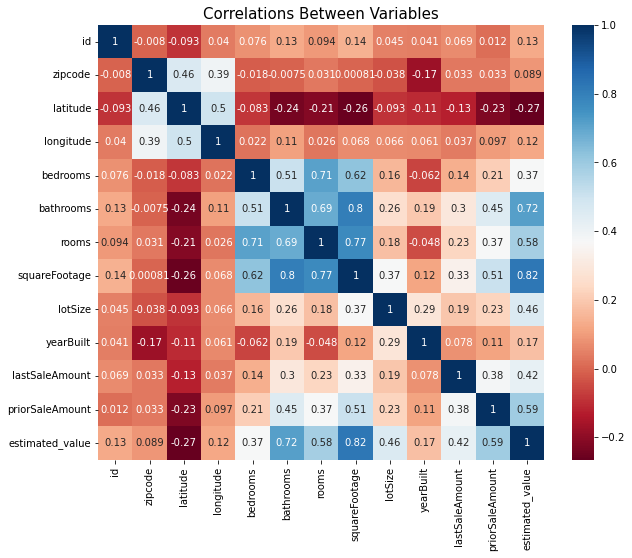

In [21]:
#Visualizing the correlations between numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu",annot=True)
plt.title("Correlations Between Variables",size=15)
plt.show()

# 1.2 Clean data

In [19]:
df=df.drop_duplicates(subset=['address'])
df

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,daysdiff
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,2044.0
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaT,NaN,343963,NaN
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaT,NaN,488840,NaN
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,158.0
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,51411356,802 S High St,Denver,CO,80209,39.701902,-104.964871,4,4.0,8,2169,4950,1922.0,2000-08-24,333000,NaT,NaN,1080081,NaN
14996,21721153,214 S Lincoln St,Denver,CO,80209,39.712608,-104.986000,3,3.0,11,2937,4500,1890.0,2015-03-05,645000,2012-07-23,557500.0,807306,955.0
14997,12995320,870 S Race St,Denver,CO,80209,39.700736,-104.963707,3,5.0,7,2937,4680,2007.0,2012-01-17,1115000,2008-07-15,1208214.0,1737156,1281.0
14998,39611615,130 S Lafayette St,Denver,CO,80209,39.714088,-104.970701,3,4.0,10,3193,4970,2005.0,2011-08-10,1350000,2004-12-07,405000.0,2008794,2437.0


For this stage, I modify the data to create new column calculating the price fluctuation per m2.
As we can see above, data type of Date column is object. Hence, for calculating purpose, I convert it to date type

In [17]:
# Change type of Date
df.lastSaleDate= pd.to_datetime(df.lastSaleDate)
df.priorSaleDate = pd.to_datetime(df.priorSaleDate)

In [18]:
# Calculate days diff to prepare for new variable 
df['daysdiff'] = df['lastSaleDate'] - df['priorSaleDate']
df['daysdiff'] = df['daysdiff'].dt.days
df.head(10)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,daysdiff
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,2044.0
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaT,NaN,343963,NaN
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaT,NaN,488840,NaN
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,158.0
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,202.0
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062,484.0
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953,3083.0
7,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321,2167.0
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,0.0,496079,218.0
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514,1127.0


In [24]:
# Check if there is any unusual issue
df.daysdiff.describe()

count    11173.000000
mean      1910.182941
std       2303.579643
min      -1398.000000
25%        281.000000
50%       1205.000000
75%       2597.000000
max      18207.000000
Name: daysdiff, dtype: float64

In [21]:
# Investigate the value which < 0
df[df['daysdiff'] < 0]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,daysdiff
520,51138584,14 N Pearl St,Denver,CO,80203,39.716824,-104.979979,1,2.0,5,2267,3994,1895.0,2000-07-13,267500,2004-05-11,47500.0,560032,-1398.0


After calculating the daysdiff column, I find out that there is a line where priorSaleDate after lastSaleDate (min < 0), so I resort 2 columns

In [26]:
# resort priorSaleDate and lastSaleDate
df[['priorSaleDate', 'lastSaleDate']] = df.apply(lambda x: pd.Series(sorted([x.priorSaleDate, x.lastSaleDate])), axis = 1)

In [27]:
# Recal and check days diff again 
df['daysdiff'] = df['lastSaleDate'] - df['priorSaleDate']
df['daysdiff'] = df['daysdiff'].dt.days
df.daysdiff.describe()

count    11173.000000
mean      1910.433187
std       2303.372091
min          0.000000
25%        281.000000
50%       1205.000000
75%       2597.000000
max      18207.000000
Name: daysdiff, dtype: float64

In [35]:
# Creat year diff column
df['diff_Year'] = df['lastSaleDate'] - df['priorSaleDate']
df['diff_Year'] = round(df['diff_Year'] / np.timedelta64(1,'Y'), 2)
df.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,daysdiff,fluct_perm2,diff_Year
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,2044.0,-65.82,5.60
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaT,223450.0,343963,NaN,-3.94,NaN
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaT,485000.0,488840,NaN,-82.36,NaN
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,158.0,77.08,0.43
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,202.0,133.62,0.55


In [26]:
# Filling the missing values in priorSaleAmount with the median of squareFootage groups
df['priorSaleAmount'] = df.groupby(['squareFootage'])['priorSaleAmount'].apply(lambda x: x.fillna(x.median()))
df.head(10)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,daysdiff
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,2044.0
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaT,223450.0,343963,NaN
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaT,485000.0,488840,NaN
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,158.0
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,202.0
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062,484.0
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953,3083.0
7,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321,2167.0
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,0.0,496079,218.0
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514,1127.0


In [27]:
# Check whether all missing values are filled
pd.set_option('display.max_columns', None)
df[df['priorSaleAmount'].isnull()]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,daysdiff
89,184339938,5565 S Lamar St,Denver,CO,80123,39.616136,-105.067951,3,3.0,7,2427,6420,1997.0,1998-05-06,227300,NaT,NaN,519776,NaN
133,184196355,6700 W Dorado Dr # 29,Denver,CO,80123,39.614540,-105.071350,1,3.0,5,1966,7353,1998.0,1998-02-01,2227300,NaT,NaN,631731,NaN
159,184335817,5454 W Prentice Cir,Denver,CO,80123,39.618614,-105.057666,4,4.0,9,3040,8250,1997.0,1998-06-18,388300,NaT,NaN,650195,NaN
174,184335814,5544 W Prentice Cir,Denver,CO,80123,39.620449,-105.059684,4,5.0,8,3817,8250,1998.0,1998-12-09,431500,NaT,NaN,742340,NaN
177,26983939,5430 W Prentice Cir,Denver,CO,80123,39.617936,-105.058447,4,4.0,10,3055,13360,1997.0,1998-06-03,387700,NaT,NaN,601300,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14870,39871095,2131 E Alameda Ave,Denver,CO,80209,39.712367,-104.962022,4,5.0,11,6256,23500,1974.0,2005-07-11,2818800,NaT,NaN,4576243,NaN
14938,184305856,2970 E Cherry Creek South Dr # 1,Denver,CO,80209,39.714232,-104.952765,4,4.0,9,2932,5499,1996.0,2003-11-26,675000,NaT,NaN,1164295,NaN
14939,184305884,295 S Milwaukee St,Denver,CO,80209,39.711249,-104.952513,3,4.0,9,3188,7549,1999.0,1999-08-17,689000,NaT,NaN,1181088,NaN
14950,30581188,501 S Corona St # 1,Denver,CO,80209,39.707280,-104.974810,5,6.0,11,4213,9520,1922.0,2007-07-19,850000,NaT,NaN,1869496,NaN


I fill missing values of 'priorSaleAmount' by median of 'squareFootage', 'bathrooms', 'rooms' respectively following the high of correlation

In [29]:
# Fill the missing values for the 2nd time with the median of bathrooms groups 
df['priorSaleAmount'] = df.groupby(['bathrooms'])['priorSaleAmount'].apply(lambda x: x.fillna(x.median()))

In [30]:
# Check whether all missing values are filled
df[df['priorSaleAmount'].isnull()]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,daysdiff
6044,216448725,2071 N Colorado Blvd # 58,Denver,CO,80205,39.748706,-104.940803,4,1.5,6,2256,108900,1945.0,2000-09-14,340000,NaT,NaN,349664,NaN


In [31]:
# Fill the missing values for the 3rd time with the median of rooms groups
df['priorSaleAmount'] = df.groupby(['rooms'])['priorSaleAmount'].apply(lambda x: x.fillna(x.median()))

In [32]:
# Check whether all missing values are filled
df[df['priorSaleAmount'].isnull()]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,daysdiff


In [33]:
# Calculate new measure which is the fluctuation of price per m2
df['fluct_perm2'] = round(((df.lastSaleAmount - df.priorSaleAmount) / df.squareFootage),2)
df.tail(5)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,daysdiff,fluct_perm2
14995,51411356,802 S High St,Denver,CO,80209,39.701902,-104.964871,4,4.0,8,2169,4950,1922.0,2000-08-24,333000,NaT,355000.0,1080081,NaN,-10.14
14996,21721153,214 S Lincoln St,Denver,CO,80209,39.712608,-104.986000,3,3.0,11,2937,4500,1890.0,2015-03-05,645000,2012-07-23,557500.0,807306,955.0,29.79
14997,12995320,870 S Race St,Denver,CO,80209,39.700736,-104.963707,3,5.0,7,2937,4680,2007.0,2012-01-17,1115000,2008-07-15,1208214.0,1737156,1281.0,-31.74
14998,39611615,130 S Lafayette St,Denver,CO,80209,39.714088,-104.970701,3,4.0,10,3193,4970,2005.0,2011-08-10,1350000,2004-12-07,405000.0,2008794,2437.0,295.96
14999,42961679,100 S University Blvd # 1,Denver,CO,80209,39.714399,-104.958955,3,5.0,9,3193,4364,2001.0,2014-05-29,960000,2003-07-11,925000.0,1421401,3975.0,10.96


In [36]:
# Calculate price per m2 fluctuation each year 
df['fluct_perm2_peryear'] = round(df['fluct_perm2'] / df['diff_Year'], 2)
# Replace infinitive number with 0
df['fluct_perm2_peryear'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
df.tail(10)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,daysdiff,fluct_perm2,diff_Year,fluct_perm2_peryear
14990,4511745,255 S Downing St,Denver,CO,80209,39.711870,-104.973735,2,2.0,5,1401,4690,1910.0,2009-10-06,385000,2005-08-03,360000.0,638952,1525.0,17.84,4.18,4.27
14991,19402362,703 S Vine St,Denver,CO,80209,39.703698,-104.963195,3,2.0,7,1401,6510,1931.0,2010-08-30,499900,NaT,330000.0,900818,NaN,121.27,NaN,0.00
14992,184311569,445 S Pearl St,Denver,CO,80209,39.708452,-104.980694,3,2.0,8,1657,4690,1892.0,1998-04-08,81800,NaT,363000.0,632156,NaN,-169.70,NaN,0.00
14993,42985979,1016 S Emerson St,Denver,CO,80209,39.698090,-104.976608,3,2.0,6,1913,4760,1909.0,2017-05-31,600000,2013-06-07,535000.0,694981,1454.0,33.98,3.98,8.54
14994,150304831,376 S High St,Denver,CO,80209,39.709681,-104.964860,3,2.0,7,1913,4990,1925.0,2015-09-10,815000,1994-05-06,142000.0,784955,7797.0,351.80,21.35,16.48
14995,51411356,802 S High St,Denver,CO,80209,39.701902,-104.964871,4,4.0,8,2169,4950,1922.0,2000-08-24,333000,NaT,355000.0,1080081,NaN,-10.14,NaN,0.00
14996,21721153,214 S Lincoln St,Denver,CO,80209,39.712608,-104.986000,3,3.0,11,2937,4500,1890.0,2015-03-05,645000,2012-07-23,557500.0,807306,955.0,29.79,2.61,11.41
14997,12995320,870 S Race St,Denver,CO,80209,39.700736,-104.963707,3,5.0,7,2937,4680,2007.0,2012-01-17,1115000,2008-07-15,1208214.0,1737156,1281.0,-31.74,3.51,-9.04
14998,39611615,130 S Lafayette St,Denver,CO,80209,39.714088,-104.970701,3,4.0,10,3193,4970,2005.0,2011-08-10,1350000,2004-12-07,405000.0,2008794,2437.0,295.96,6.67,44.37
14999,42961679,100 S University Blvd # 1,Denver,CO,80209,39.714399,-104.958955,3,5.0,9,3193,4364,2001.0,2014-05-29,960000,2003-07-11,925000.0,1421401,3975.0,10.96,10.88,1.01


# 2. Data analysis

In [37]:
df['yearlastsale'] = pd.DatetimeIndex(df.lastSaleDate).year
df['yearpriorsale'] = pd.DatetimeIndex(df.priorSaleDate).year

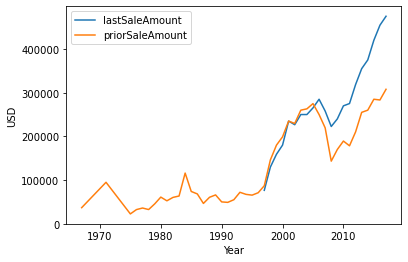

In [38]:
df.groupby('yearlastsale')['lastSaleAmount'].median().plot()
df.groupby('yearpriorsale')['priorSaleAmount'].median().plot()
plt.xlabel('Year')
plt.ylabel('USD')
plt.legend(['lastSaleAmount','priorSaleAmount'])

<AxesSubplot:>

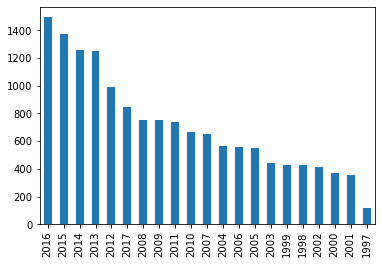

In [39]:
df['yearlastsale'].value_counts().plot(kind = 'bar')

In [40]:
# See some information of new variable
df['fluct_perm2_peryear'].describe()

count    14998.000000
mean        90.202366
std        455.335455
min      -8238.000000
25%          0.000000
50%         11.125000
75%         44.067500
max      23182.000000
Name: fluct_perm2_peryear, dtype: float64

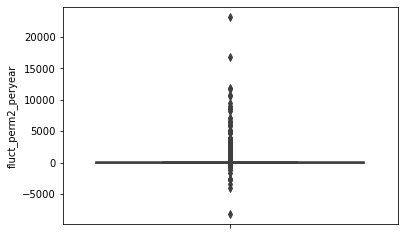

In [41]:
# Draw boxplot to see if there are many outliners
sns.boxplot(y=df["fluct_perm2_peryear"] );
#plt.ylim(-10, 100)
plt.show()

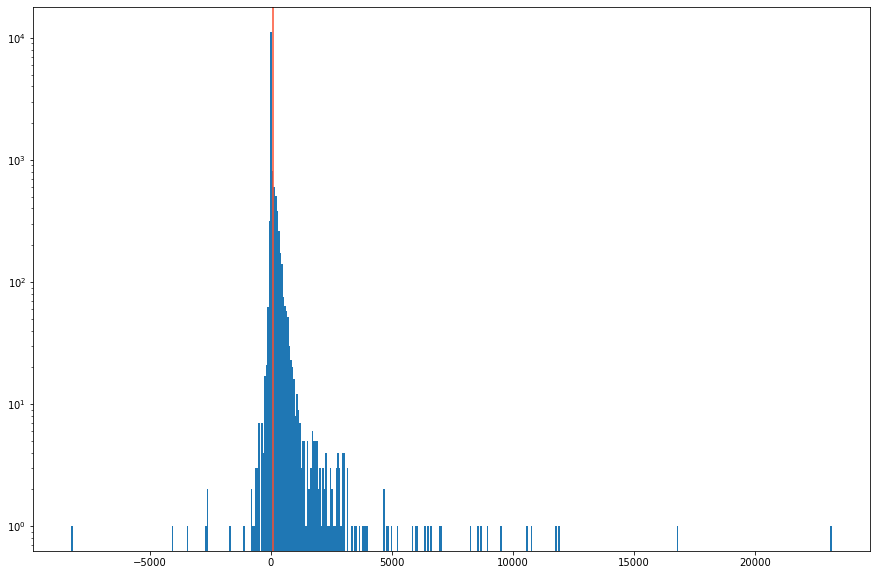

In [39]:
# Draw histogram to see the central tendency of data
plt.figure(figsize=(15,10))
median =  90.190341
color = '#fc4f30'
plt.axvline(median, color=color, label='Price fluct median') 
plt.hist(df['fluct_perm2_peryear'], bins=500, log=True);

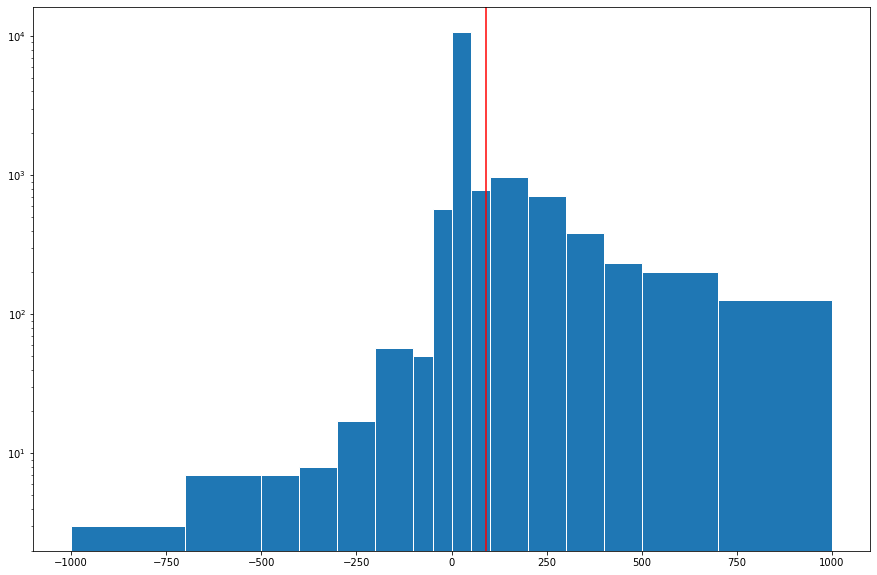

In [43]:
# Closer look into histogram 
plt.figure(figsize=(15,10))
bins = [-1000, -700, -500, -400, -300, -200, -100, -50, 0, 50, 100, 200, 300, 400, 500, 700, 1000]
meadian =  90.190341

plt.axvline(median, color='r', label='Price fluct meadian') 

plt.hist(df['fluct_perm2_peryear'], bins=bins, edgecolor='white', log=True);

In [44]:
# Grouping the fluctuation of price per m2 per year
df['Trend'] = df['fluct_perm2_peryear'].apply(lambda x: 'increase' if x>0 else ('decrease' if x<0 else 'no fluctuation'))
df['Increase'] = df['Trend'].apply(lambda y: 1 if y == 'increase' else 0)
df['Decrease'] = df['Trend'].apply(lambda z: 1 if z == 'decrease' else 0)
df['No_fluct'] = df['Trend'].apply(lambda w: 1 if w == 'no fluctuation' else 0)
df.head(10)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value,daysdiff,diff_Year,fluct_perm2,fluct_perm2_peryear,yearlastsale,yearpriorsale,Trend,Increase,Decrease,No_fluct
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753,2044.0,5.60,-65.82,-11.75,2009,2004.0,decrease,0,1,0
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaT,223450.0,343963,NaN,NaN,-3.94,0.00,2004,NaN,no fluctuation,0,0,1
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaT,485000.0,488840,NaN,NaN,-82.36,0.00,2008,NaN,no fluctuation,0,0,1
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073,158.0,0.43,77.08,179.26,2008,2008.0,increase,1,0,0
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676,202.0,0.55,133.62,242.95,2012,2011.0,increase,1,0,0
5,3523925,6535 W Sumac Ave,Denver,CO,80123,39.615136,-105.069018,3,5.0,7,2051,6045,1996.0,2006-09-12,363500,2005-05-16,339000.0,496062,484.0,1.33,11.95,8.98,2006,2005.0,increase,1,0,0
6,30560679,6673 W Berry Ave,Denver,CO,80123,39.616350,-105.070760,4,4.0,8,2051,6315,1997.0,2014-12-15,420000,2006-07-07,345000.0,514953,3083.0,8.44,36.57,4.33,2014,2006.0,increase,1,0,0
7,39623928,5640 S Otis St,Denver,CO,80123,39.615213,-105.070617,3,3.0,7,2051,8133,1997.0,2004-03-15,328700,1998-04-09,225200.0,494321,2167.0,5.93,50.46,8.51,2004,1998.0,increase,1,0,0
8,148975825,5342 S Gray St,Denver,CO,80123,39.620158,-105.063094,3,3.0,7,1796,5038,1999.0,2011-08-16,274900,2011-01-10,0.0,496079,218.0,0.60,153.06,255.10,2011,2011.0,increase,1,0,0
9,184623176,4967 S Wadsworth Blvd,Denver,CO,80123,39.626770,-105.081990,3,3.0,0,2054,4050,2007.0,2015-12-01,407000,2012-10-30,312000.0,424514,1127.0,3.09,46.25,14.97,2015,2012.0,increase,1,0,0


In [45]:
# Calculate % of each group
trend = df.groupby(['Trend'])['Trend']
counts = trend.count()
percent100 = round((counts * 100 / len(df['Trend'])), 2).astype(str) + '%'
pd.DataFrame({'counts': counts, 'percent': percent100})

,counts,percent
Trend,,
decrease,724,4.83%
increase,10218,68.13%
no fluctuation,4056,27.04%


Overall Comments:

1/ Houses' prices
+ Over 90% of houses had the price's increase from 0-45/m2/year, which was extremely wide
+ From the histogram of price's fluctuation per m2 per year, we can see the shape is leptokurtic, which also means the outliners are significantly fluctuated compared to normal distribution

2/ Trend
+ The vibrant period for trading houses was from 1997 to 2017, houses were sold more and more over the years
+ The price increased significantly from 1997 to 2007, from 2007-2008 it dropped dramatically to the bottom. After that it revised substantially. These movement was quiet in place with the proceedings of bubble housing 2008
+ Most of the houses' price experienced the increase trend (about 68% of the population). The 2nd place was "no fluctuation" group which was about 27% of total population, and only 5% of houses' price was decreased

# 2.1 By rooms

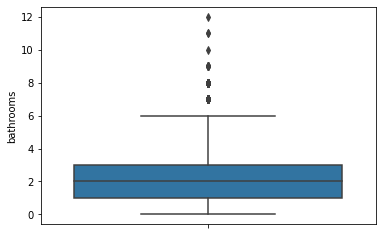

In [48]:
sns.boxplot(y=df["bathrooms"] );

#plt.ylim(-20, 100)
plt.show()

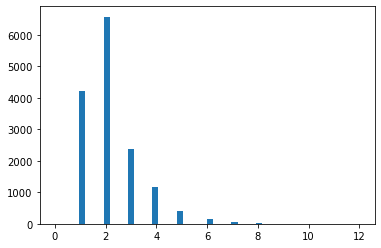

In [49]:
# plt.figure(figsize=(15,10))
plt.hist(df['bathrooms'], bins=50);

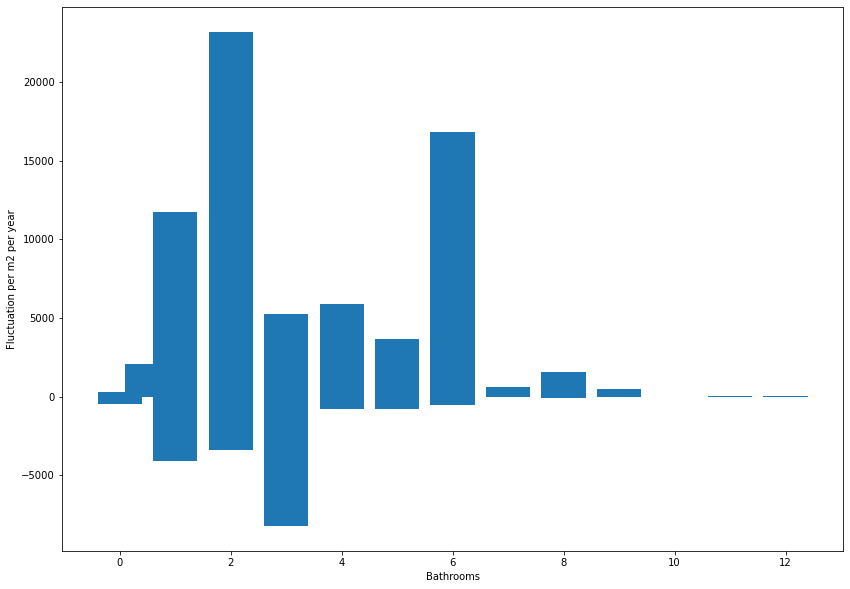

In [50]:
plt.figure(figsize=(14,10))

plt.bar(x=df['bathrooms'], height=df['fluct_perm2_peryear'])

plt.xlabel('Bathrooms')
plt.ylabel('Fluctuation per m2 per year')
plt.show()

In [51]:
df1 = df[df['bathrooms'].isin([6])]
df1.groupby(['zipcode'])['bathrooms'].count()

zipcode
80123     1
80203     6
80204     2
80205     4
80206    80
80207     9
80209    49
Name: bathrooms, dtype: int64

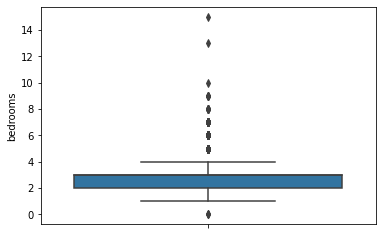

In [52]:
sns.boxplot(y=df["bedrooms"] );

# plt.ylim(0, 5)
plt.show()

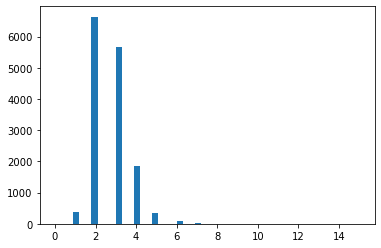

In [53]:
# plt.figure(figsize=(15,10))
plt.hist(df['bedrooms'], bins=50);

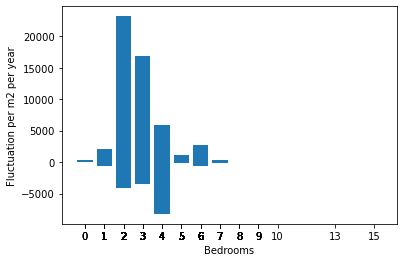

In [54]:
# plt.figure(figsize=(10,8))
bedr, fmy1 = df['bedrooms'], df['fluct_perm2_peryear']
plt.bar(x=bedr, height=fmy1)
plt.xticks(bedr)
plt.xlabel('Bedrooms')
plt.ylabel('Fluctuation per m2 per year')
plt.show()

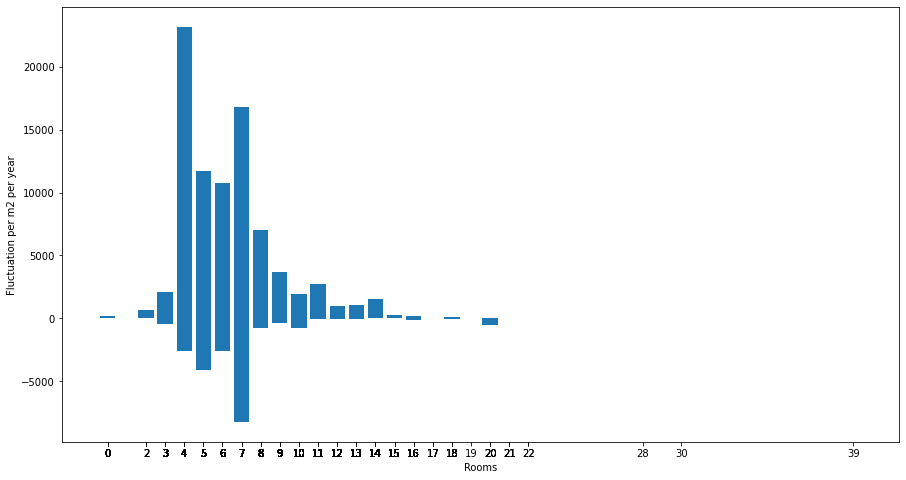

In [55]:
plt.figure(figsize=(15,8))
r, fmy2 = df['rooms'], df['fluct_perm2_peryear']
plt.bar(x=r, height=fmy1)
plt.xticks(r)
plt.xlabel('Rooms')
plt.ylabel('Fluctuation per m2 per year')
plt.show()

Comments:

Over 90% of houses had 2-3 bedrooms and 1-3 bathrooms
Houses which have 2 bedrooms and 2 bathrooms accounted for the highest price's fluctuation (both increase and decrease). Those houses which have 1, 3 or 4 bedrooms also increased much. These kinds of houses seemed to fit with single person, couples or small families.

The house which had the highest number of room was decreased in price.

Hence, it seems like the more rooms the houses had, the lower prices they were.

# 2.2 By location

<AxesSubplot:xlabel='zipcode'>

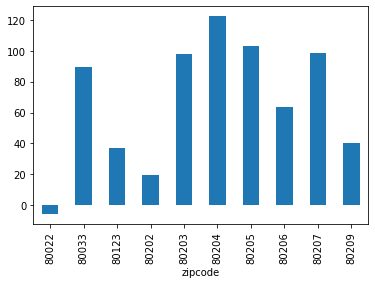

In [56]:
df.groupby('zipcode')['fluct_perm2_peryear'].mean().plot(kind = 'bar')

In [57]:
df.corr().loc['fluct_perm2_peryear', :].sort_values(ascending=False)

fluct_perm2_peryear    1.000000
Increase               0.154500
yearpriorsale          0.140464
fluct_perm2            0.133695
lastSaleAmount         0.104516
yearlastsale           0.042854
latitude               0.040699
yearBuilt              0.033007
lotSize                0.007232
zipcode                0.005708
estimated_value        0.002888
longitude             -0.007376
id                    -0.008802
bathrooms             -0.019897
bedrooms              -0.032246
squareFootage         -0.037732
rooms                 -0.046140
Decrease              -0.085927
priorSaleAmount       -0.112128
No_fluct              -0.120615
daysdiff              -0.158375
diff_Year             -0.158378
Name: fluct_perm2_peryear, dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

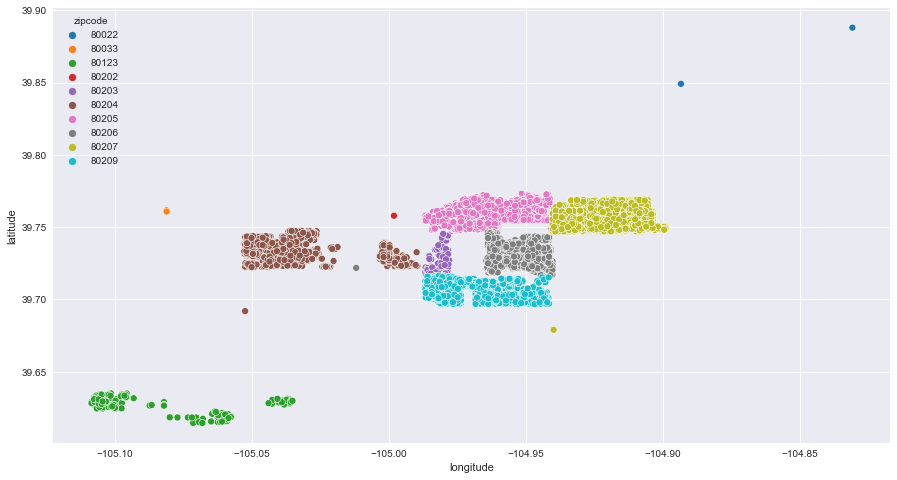

In [80]:
### Show the location of zipcode on map
df['zipcode'] = df['zipcode'].astype(str)
plt.figure(figsize=(15,8))
plt.style.use('seaborn')
sns.scatterplot(data=df, x="longitude", y="latitude", hue="zipcode", palette="tab10")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

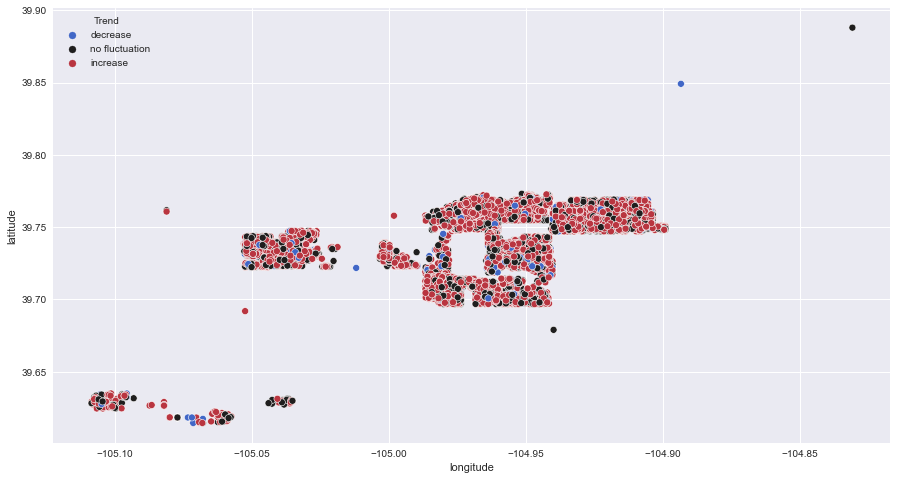

In [81]:
### Fluctuation trend by longitude & latitude
plt.figure(figsize=(15,8))
plt.style.use('seaborn')
sns.scatterplot(data=df, x="longitude", y="latitude", hue="Trend", palette="icefire")

E:\software\anaconda\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Luc Nguyen\AppData\Local\Temp\ipykernel_8104\2046555226.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Fluctuation per m2 per year')


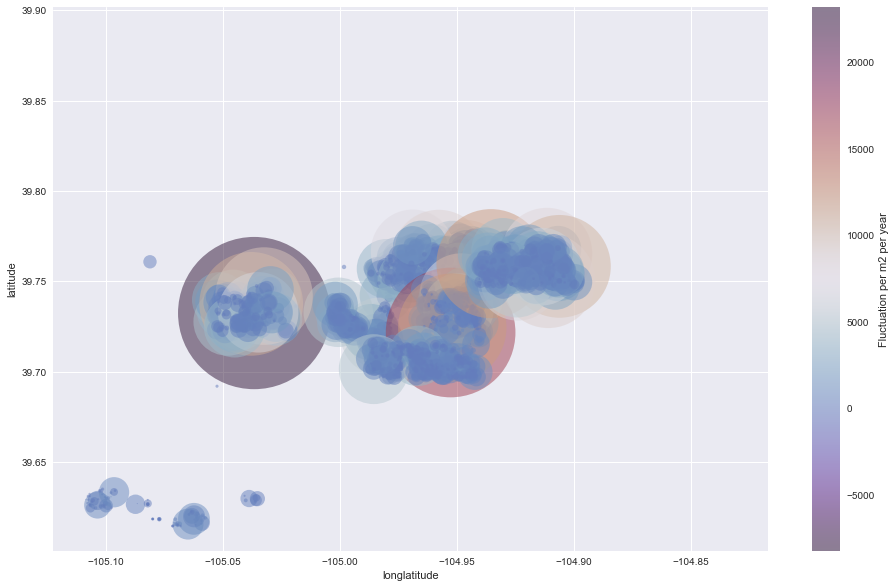

In [83]:
### Fluctuation price per m2 per year by longitude & latitude

lat, lon = df['latitude'], df['longitude']
fluctpm2py, zc = df['fluct_perm2_peryear'], df['zipcode']

plt.style.use('seaborn')
plt.figure(figsize=(16,10))

# Plot using Pyplot API
plt.scatter(lon, lat, 
            c=fluctpm2py, cmap='twilight_shifted',
            s=fluctpm2py, linewidths=0, alpha=0.5)

# plt.axis('equal')
plt.xlabel('longlatitude')
plt.ylabel('latitude');
plt.colorbar(label='Fluctuation per m2 per year')
# plt.clim(100, 20000)

Comments:

1/ Analyze by location

As we can see from the chart below, most of the citizens live in the central of the city. That's why most of the increase appeared in that area

2 highest price increase located in Villa Park (west of the central area), and Cherry Creek (east of the city)

2/ The relevant with US housing bubble

The density of the increase trend grew from 1997 to 2008 and drop afterwards for about 7-8 years before it recovered again in 2016
-> This trend is quite in line with the house market situation in USA. The unprecedented increase in house prices starting in 1997, the housing bubble in 2008 made the whole market collapsed for a decade until the recovery from 2016

We can see most of the decrease also appeared in this period from 2008-2015